In [1]:
#Import the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import the file to notebook with name 'df'
#Check the data for the columns and no. of rows present

In [4]:
df=pd.read_excel(r'F:\Data Analysis\Capstone Project\3\data.xlsx')

In [5]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
#Check for any null values
#Since there are no null values, no need to drop any rows

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#Check for any duplicate rows

In [10]:
df.duplicated().sum()

1

In [11]:
#as we can see there's one duplicate row, drop it

In [12]:
df[df.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [13]:
df.drop(164,axis=0,inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
#Get a preliminary statistical summary of the data. 
#Explore the measures of central tendencies and the spread of the data overall.

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
#Identify the data variables which might be categorical in nature. 
#Describe and explore these variables using appropriate tools. For example: count plot.

#Variables which are categorical in nature are 'sex','cp','fbs','exang','ca','thal'
#Lets see how it affects our target variable

In [18]:
#Gender
#As we can see data for female is only around 100 but for male it is 200. But still around 72 female have CVD,
#where as 92 male have CVD, SO we can assume that female are more likely to have CVD

In [19]:
df.groupby(['sex','target'])['target'].count()

sex  target
0    0          24
     1          72
1    0         114
     1          92
Name: target, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

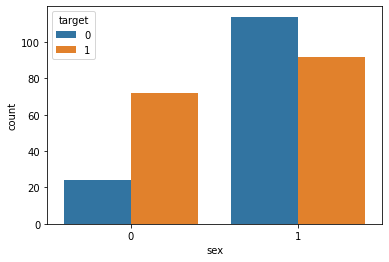

In [20]:
sns.countplot(x='sex',hue='target',data=df)

In [21]:
#cp- chest pain type-4 types
#we can see that majority of the people have type 0 chest pain, but that has very less no. of people with CVD
#where as people with chest pain type 1 and 2 are more likely to have CVD.

<AxesSubplot:xlabel='cp', ylabel='count'>

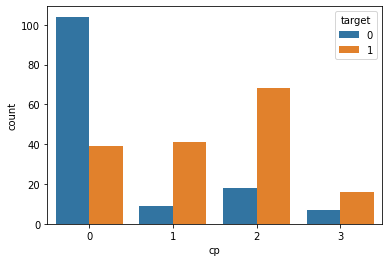

In [22]:
sns.countplot(x='cp',hue='target',data=df)

In [23]:
#fbs=(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#As we can see majority of people have fbs<120mg/dl , but people with fbs>120mg/dl have almost 50-50 chance 
#of having CVD.
#So we can assume that fbs doesnt play a major role in deciding CVD.

<AxesSubplot:xlabel='fbs', ylabel='count'>

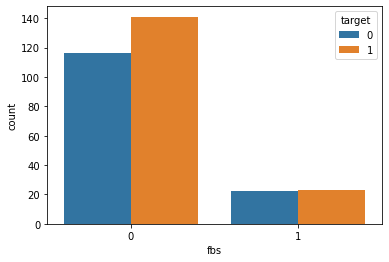

In [24]:
sns.countplot(x='fbs',hue='target',data=df)

In [25]:
#exang = exercise induced angina (1 = yes; 0 = no)
#as we can, in people who have CVD , chestpain due to exercise was very less
#So we can assume that Chestpain due to exercise need to be necessarily CVD.

<AxesSubplot:xlabel='exang', ylabel='count'>

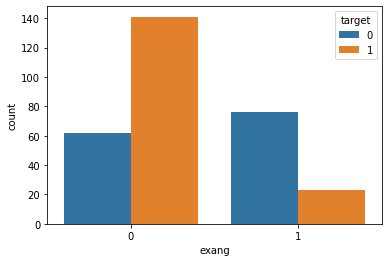

In [26]:
sns.countplot(x='exang',hue='target',data=df)

In [27]:
#ca- number of major vessels (0-3) colored by flourosopy
# as we can see type 0 has highest number of people with CVD.

<AxesSubplot:xlabel='ca', ylabel='count'>

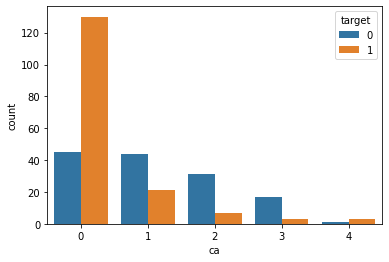

In [28]:
sns.countplot(x='ca',hue='target',data=df)

In [29]:
#thal- 3 = normal; 6 = fixed defect; 7 = reversable defect
#as we can see people with type 2 thal have very high chance of having CVD

<AxesSubplot:xlabel='thal', ylabel='count'>

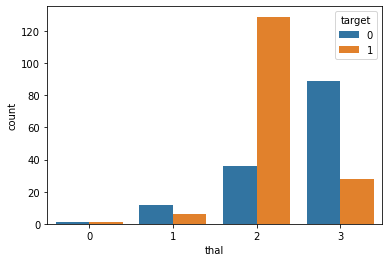

In [30]:
sns.countplot(x='thal',hue='target',data=df)

In [31]:
#Study the occurrence of CVD across different ages

#first we will create seperate table for people with CVD
#then plot histogram for that table
#as we can see people aged from 50 to 60 have very high chance of having CVD

In [32]:
with_CVD = df[df['target']==1]

<AxesSubplot:xlabel='age', ylabel='Count'>

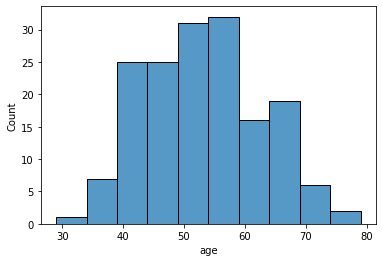

In [33]:
sns.histplot(with_CVD['age'],binwidth=5)

In [34]:
#Can we detect heart attack based on anomalies in resting blood pressure of the patient?

#Plotted both scatterplot and box plot to analise the data
#as we can see mean blood pressure for people with CVD and without CVD are almost same
#and also few high anamolies present in people who doesnt have CVD.
#So it is difficult to detect heart attack based on anomalies in resting blood pressure of the patient.

<AxesSubplot:xlabel='target', ylabel='trestbps'>

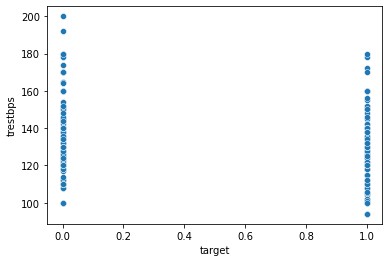

In [35]:
sns.scatterplot(x=df['target'],y=df['trestbps'])

<AxesSubplot:xlabel='target', ylabel='trestbps'>

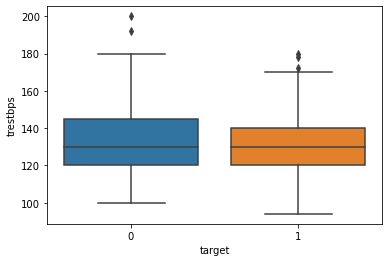

In [36]:
sns.boxplot(x=df['target'],y=df['trestbps'])

In [37]:
#Study the composition of overall patients w.r.t . gender.

#around 68% of the patients are male.

<AxesSubplot:ylabel='sex'>

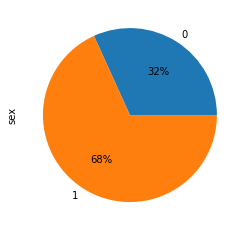

In [38]:
df.groupby('sex')['sex'].count().plot.pie(autopct='%1.0f%%')

In [39]:
#Describe the relationship between cholesterol levels and our target variable

#Plotted both scatterplot and box plot to analise the data
#average value of cholestrol level of people who doesnt have CVD is more than the people who have CVD.
#and also we can see that few high choestrol level in people who have CVD
#But heart attacks cant be predicted based on cholestrol level

<AxesSubplot:xlabel='target', ylabel='chol'>

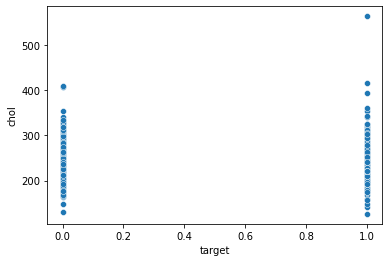

In [40]:
sns.scatterplot(x=df['target'],y=df['chol'])

<AxesSubplot:xlabel='target', ylabel='chol'>

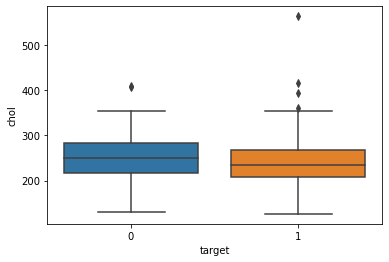

In [41]:
sns.boxplot(x=df['target'],y=df['chol'])

In [42]:
#What can be concluded about the relationship between peak exercising and occurrence of heart attack?

#as we can, in people who have CVD , chestpain due to exercise was very less
#So we can assume that Chestpain due to exercise need to be necessarily CVD.

<AxesSubplot:xlabel='exang', ylabel='count'>

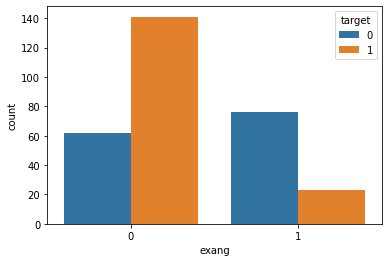

In [43]:
sns.countplot(x='exang',hue='target',data=df)

In [44]:
#Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?

#as we can see people who have type 2 thalassemia usually have CVD
#so we can predict people with type 2 thalassemia is more likely to have CVD

<AxesSubplot:xlabel='thal', ylabel='count'>

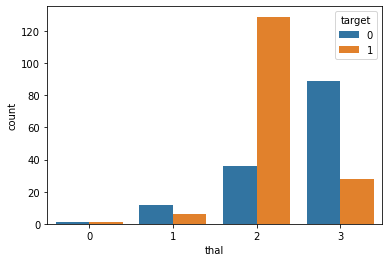

In [45]:
sns.countplot(x='thal',hue='target',data=df)

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
#Use a pair plot to understand the relationship between all the given variables.

#as we can see from plots that none of the variables are directly related to occurence of CVD,
# and also none of the variables are related to each other.

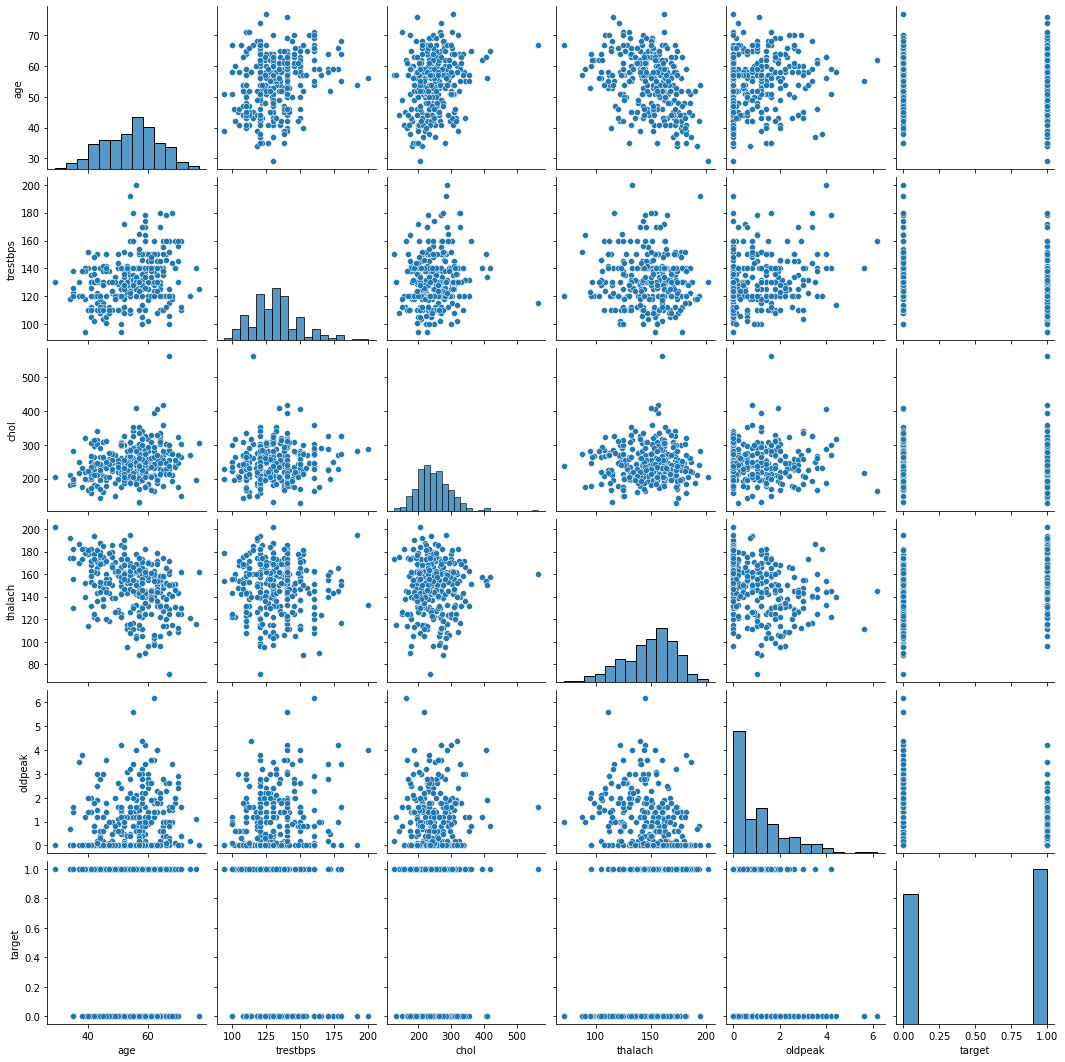

In [48]:
sns.pairplot(df[['age','trestbps','chol','thalach','oldpeak','target']])

In [49]:
#Perform logistic regression, predict the outcome for test data, and validate the results by using 
#the confusion matrix.

In [50]:
#create one hot encoding for variables which have more than 2 categories

In [51]:
cp=pd.get_dummies(df['cp'],drop_first=True)
restecg=pd.get_dummies(df['restecg'],drop_first=True)
thal=pd.get_dummies(df['thal'],drop_first=True)

In [52]:
#create input variables table by removing 'target' and variables which we one hot encoded

In [53]:
X = df.drop(['cp','restecg','thal','target'],axis=1)

In [54]:
#Add one hot encoded columns to input variable table

In [55]:
X=pd.concat([X,cp,restecg,thal],axis=1)

In [56]:
#create output table Y.

In [57]:
Y=df['target']

In [58]:
#import train_test_split and divide the data into train and test data.

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [60]:
#import LogisticRegression model and train it using x_train and y_train

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [62]:
lr.fit(x_train,y_train)

LogisticRegression()

In [63]:
#create y_pred using 'x_test'

In [64]:
y_pred = lr.predict(x_test)

In [65]:
#Find out the confusion matrix and accuracy score using y_test and y_pred

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[30,  8],
       [10, 43]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8021978021978022